# Sasonal Time Series

In [4]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 6.0MB/s 
     |████████████████████████████████| 2.1MB 39.1MB/s 
     |████████████████████████████████| 9.5MB 34.0MB/s 
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error

In [6]:
import pmdarima as pm
from statsmodels.tsa.api import ExponentialSmoothing

In [7]:
import statsmodels.api as sm

In [8]:
import statsmodels.tsa.api as tsa

In [9]:
import statsmodels.tools as tools

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/mmbs1989/DSWP-Aluno/main/dadostccdata.csv")
dfa = pd.read_csv("https://raw.githubusercontent.com/mmbs1989/DSWP-Aluno/main/dadostcca.csv")
df = df.drop(df.index[314:])
dfa = dfa.drop(dfa.index[314:])
df['a'] = dfa['a']
df['a'] = pd.to_numeric(df['a'])
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df.set_index('ds', inplace=True)

In [11]:
# previsão para 6 meses
train = df.iloc[:-6].copy()  
test =  df.iloc[-6:].copy()  

## Holt Winter’s Exponential Smoothing - suavização esponecial
<https://www.statsmodels.org/dev/tsa.html>

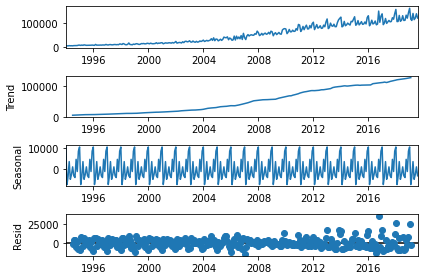

In [12]:
tsa.seasonal_decompose(train).plot()
result = tsa.stattools.adfuller(train)
plt.show()

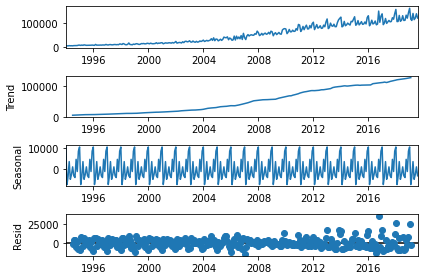

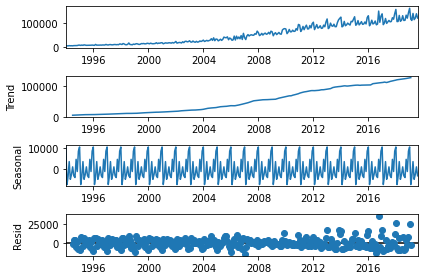

In [13]:
tsa.seasonal_decompose(train, model= 'additive').plot()

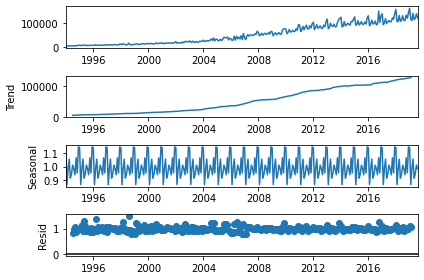

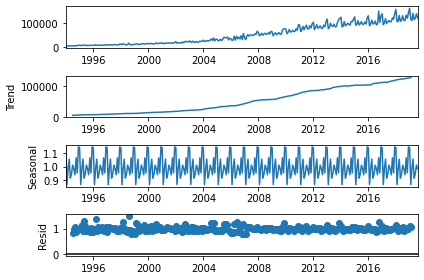

In [14]:
decomposition = tsa.seasonal_decompose(train, model= 'multiplicative')
#decomposition.observed, decomposition.trend, decomposition.sesonal, decomposition.resid
decomposition.plot()

In [ ]:
# modelo multiplicativo varia em amplitude e frequência no tempo

In [15]:
modfit = ExponentialSmoothing(np.asarray(train), seasonal_periods= 12, trend='add', seasonal='add').fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [16]:
test['train_Holt_Winter'] = modfit.forecast(len(test))

In [17]:
test

,y,train_Holt_Winter
ds,,
2019-09-01,113933,120192.078362
2019-10-01,135202,143201.794666
2019-11-01,125161,129379.634521
2019-12-01,147501,151534.095484
2020-01-01,174991,166684.553626
2020-02-01,116430,120523.008043


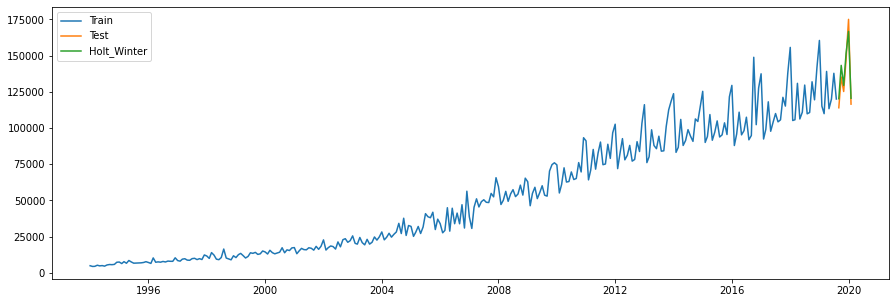

In [18]:
plt.figure(figsize=(15,5))
plt.plot(train, label= "Train")
plt.plot(test.y, label= 'Test')
plt.plot(test.train_Holt_Winter, label= 'Holt_Winter')
plt.legend(loc= 'best')
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error
print(f'MSE= {mean_squared_error(test.y, test.train_Holt_Winter)}')

MSE= 37164213.20890033


In [20]:
print(f'MSE= {tools.eval_measures.mse(test.y, test.train_Holt_Winter, axis=0)}')

MSE= 37164213.20890033


In [21]:
modfit.summary()

Dep. Variable:,endog,No. Observations:,308
Model:,ExponentialSmoothing,SSE,7094248396.968
Optimized:,True,AIC,5253.355
Trend:,Additive,BIC,5313.036
Seasonal:,Additive,AICC,5255.722
Seasonal Periods:,12,Date:,"Tue, 02 Feb 2021"
Box-Cox:,False,Time:,19:32:35
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1464286,alpha,True
smoothing_trend,0.0266234,beta,True


## SARIMAX - Seasonal ARIMA
#### order=(p, d, q), the dependent variable and any independent variables are differenced d times and
- 1/p lags of autocorrelations
- 1/q lags of moving averages
#### seasonal_order= (P, D, Q, s) multiplicative seasonal componentes. Variables are lag s, seasonally differenced D times and
- 1/P seasonal lags of autoregressive terms - valores significativos de plot_pacf
- 1/Q seasonal lags of moving-average terms - valores significativos de plot_acf

In [22]:
modfit = tsa.statespace.SARIMAX(train, order=(1, 0, 0), seasonal_order= (1,1,1,12)).fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [23]:
test['train_SARIMAX'] = modfit.forecast(len(test))

In [24]:
print(f'RMSE= {mean_squared_error(test.y, test.train_SARIMAX)}')

RMSE= 15433250.95007663


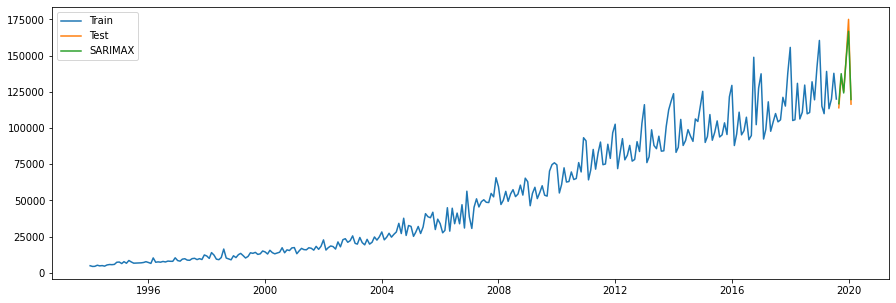

In [25]:
plt.figure(figsize=(15,5))
plt.plot(train, label= "Train")
plt.plot(test.y, label= 'Test')
plt.plot(test.train_SARIMAX, label= 'SARIMAX')
plt.legend(loc= 'best')
plt.show()

In [26]:
modfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  308
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 12)   Log Likelihood               -2999.893
Date:                              Tue, 02 Feb 2021   AIC                           6007.787
Time:                                      19:34:52   BIC                           6022.548
Sample:                                  01-01-1994   HQIC                          6013.697
                                       - 08-01-2019                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3018      0.046      6.598      0.000       0.212       0.391
ar.S.L12       0.9935      0.013     79.056      0.000       0.969       1.018
ma.S.L12      -0.9313      0.043    -21.651      0.000      -1.016      -0.847
sigma2      4.104e+07   1.13e-09   3.63e+16      0.000     4.1e+07     4.1e+07
===================================================================================
Ljung-Box (L1) (Q):                   5.42   Jarque-Bera (JB):              2750.45
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):              21.76   Skew:                             0.83
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.05e+31. Standard errors may be unstable.
"""

In [27]:
test

,y,train_Holt_Winter,train_SARIMAX
ds,,,
2019-09-01,113933,120192.078362,116751.449240
2019-10-01,135202,143201.794666,137459.157723
2019-11-01,125161,129379.634521,124159.224771
2019-12-01,147501,151534.095484,146954.705659
2020-01-01,174991,166684.553626,166759.125026
2020-02-01,116430,120523.008043,119669.649963


### Alimento Sarimax

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

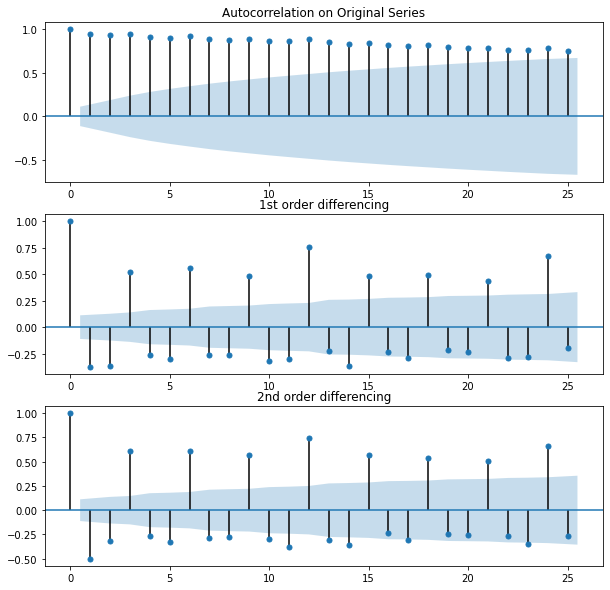

In [29]:
# order of differencing, d, using auto correlation
fig = plt.figure(figsize=(10,10))
ax1= fig.add_subplot(311)
fig= plot_acf(train, ax= ax1, title= 'Autocorrelation on Original Series')   # series.squeeze()
ax2= fig.add_subplot(312)
fig= plot_acf(train.diff().dropna(), ax= ax2, title= '1st order differencing')
ax3= fig.add_subplot(313)
fig= plot_acf(train.diff().diff().dropna(), ax= ax3, title= '2nd order differencing')
#plt.show()

##### aproxima-se  de uma série estacionária com a 1st diferenciação (d = 1)
#### para d = 1, 1st lag significativo, q = 1 (moving avarages)

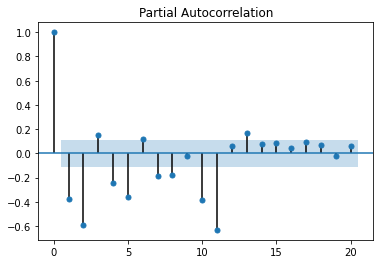

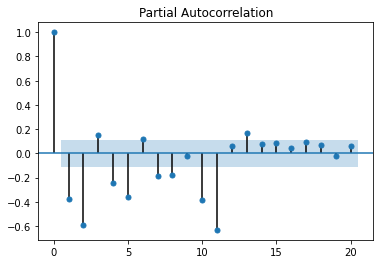

In [30]:
# order of AR, p, using partial autocorrelation  # d obtido na celula acima
plot_pacf(train.diff().dropna(), lags= 20)

In [31]:
modfit = tsa.statespace.SARIMAX(train, order=(1, 1, 1), seasonal_order= (0,1,0,12)).fit()
# order(p, d, q) #  1/p autocorrelations lags  #  1/q moving avareges lags

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [32]:
test['train2_SARIMAX'] = modfit.forecast(len(test))

In [33]:
print(f'MSE= {tools.eval_measures.mse(test.y, test.train2_SARIMAX, axis=0)}')

MSE= 22408702.313444704


In [34]:
modfit.aic

5936.854419368409

In [35]:
modfit.bic

5947.915345437429

In [36]:
modfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  308
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood               -2965.427
Date:                             Tue, 02 Feb 2021   AIC                           5936.854
Time:                                     19:37:28   BIC                           5947.915
Sample:                                 01-01-1994   HQIC                          5941.283
                                      - 08-01-2019                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1067      0.059      1.823      0.068      -0.008       0.221
ma.L1         -0.9160      0.024    -37.963      0.000      -0.963      -0.869
sigma2      3.469e+07   3.49e-10   9.94e+16      0.000    3.47e+07    3.47e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              3664.91
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):              19.52   Skew:                             1.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.03e+32. Standard errors may be unstable.
"""

In [ ]:
#import statsmodels.api as sm

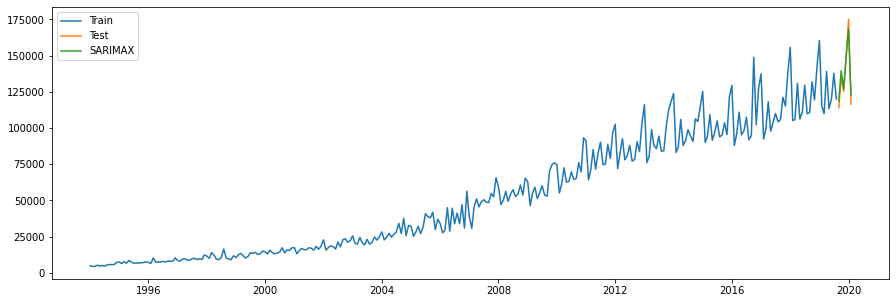

In [37]:
plt.figure(figsize=(15,5))
plt.plot(train, label= "Train")
plt.plot(test.y, label= 'Test')
plt.plot(test.train2_SARIMAX, label= 'SARIMAX')
plt.legend(loc= 'best')
plt.show()

## Py auto.arima - pmdarima
<https://github.com/alkaline-ml/pmdarima>

In [50]:
model = pm.auto_arima(train, start_p=1, start_q=1, test='adf', seasonal= True, m=12)

/usr/local/lib/python3.6/dist-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(2,1,1)(2,0,1)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.6/dist-packages/pmdarima/arima/arima.py", line 482, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.6/dist-packages/pmdarima/arima/arima.py", line 403, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.6/dist-packages/pmdarima/arima/arima.py", line 397, in _fit_wrapper
    **fit_args)
  File "/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 695, in fit
    skip_hessian=True, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py", line

In [51]:
pred = model.predict(test.shape[0])

In [52]:
test['train_auto_ARIMA'] = pred

In [53]:
print(f'RMSE= {mean_squared_error(test.y, test.train_auto_ARIMA)}')

RMSE= 50630329.34598476


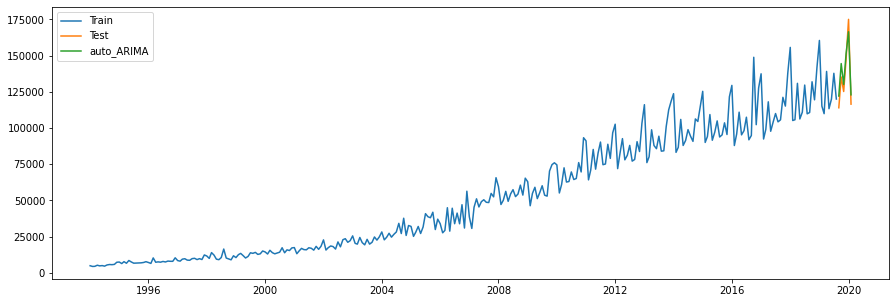

In [54]:
plt.figure(figsize=(15,5))
plt.plot(train, label= "Train")
plt.plot(test.y, label= 'Test')
plt.plot(test.train_auto_ARIMA, label= 'auto_ARIMA')
plt.legend(loc= 'best')
plt.show()

In [55]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  308
Model:             SARIMAX(2, 1, 0)x(2, 0, [1], 12)   Log Likelihood               -3069.731
Date:                              Tue, 02 Feb 2021   AIC                           6153.462
Time:                                      19:44:35   BIC                           6179.550
Sample:                                           0   HQIC                          6163.894
                                              - 308                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -65.3252    160.638     -0.407      0.684    -380.171     249.521
ar.L1         -0.6467      0.035    -18.744      0.000      -0.714      -0.579
ar.L2         -0.3391      0.041     -8.291      0.000      -0.419      -0.259
ar.S.L12       0.8615      0.115      7.513      0.000       0.637       1.086
ar.S.L24       0.1038      0.101      1.030      0.303      -0.094       0.301
ma.S.L12      -0.4493      0.114     -3.925      0.000      -0.674      -0.225
sigma2      2.797e+07      0.013   2.08e+09      0.000     2.8e+07     2.8e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.82   Jarque-Bera (JB):              3426.37
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):              20.61   Skew:                             2.28
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.89e+23. Standard errors may be unstable.
"""